In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#  Load the primary dataset
df = pd.read_csv('Complications.csv')

#  Load the demographics dataset
demographics_df = pd.read_csv('demographics.csv', low_memory=False)

#  Merge the two datasets on 'state_code'
df = pd.merge(df, demographics_df, on='state_code', how='left', suffixes=('_main', '_demo'))

In [3]:
# Create the 'any_complication' column if it doesn't exist
complication_columns = ['unplanned_hysterectomy', 'intensive_care', 'maternal_transfusion', 'perineal_laceration', 'ruptured_uterus']
df['any_complication'] = df[complication_columns].any(axis=1).astype(int)

In [4]:
# Drop unnecessary columns (e.g., '_perc' columns)
df = df.drop(columns=[col for col in df.columns if col.endswith('_perc')])

In [5]:
# Define the features and target variable
features = ['state_main', 'age_cat', 'bmi_cat', 'race_cat', 'prev_csection', 'total_births_main']
target_column = 'any_complication'

In [6]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df[features], columns=['state_main', 'age_cat', 'bmi_cat', 'race_cat'], drop_first=True)

In [7]:
# Define the feature matrix (X) and target vector (y)
X = df_encoded
y = df[target_column]

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build and train the random forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [10]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

In [11]:
# Evaluate the model
print("Random Forest Model - 'any_complication'")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Model - 'any_complication'
Accuracy: 0.9623556375226056
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8751
           1       0.97      0.99      0.98    270494

    accuracy                           0.96    279245
   macro avg       0.48      0.50      0.49    279245
weighted avg       0.94      0.96      0.95    279245



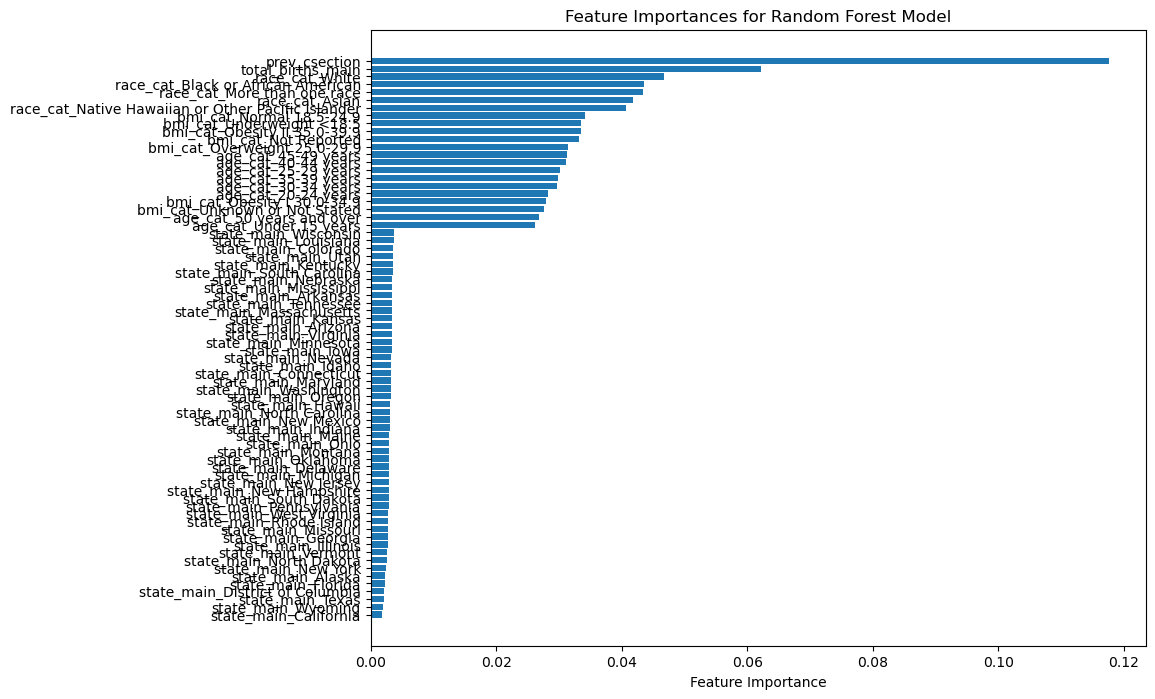

In [12]:
# Get feature importances
feature_importances = rf_clf.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Random Forest Model')
plt.show()

In [13]:
# Extract feature importances from the random forest model
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to list feature names along with their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features with the highest importance
print(feature_importance_df.head(10))

# Display the full list of feature importances
pd.set_option('display.max_rows', None)  
print(feature_importance_df)

                                              Feature  Importance
0                                       prev_csection    0.117589
1                                   total_births_main    0.062114
71                                     race_cat_White    0.046702
68                 race_cat_Black or African American    0.043546
69                        race_cat_More than one race    0.043385
67                                     race_cat_Asian    0.041773
70  race_cat_Native Hawaiian or Other Pacific Isla...    0.040658
60                           bmi_cat_Normal 18.5-24.9    0.034098
65                          bmi_cat_Underweight <18.5    0.033538
63                       bmi_cat_Obesity II 35.0-39.9    0.033469
                                              Feature  Importance
0                                       prev_csection    0.117589
1                                   total_births_main    0.062114
71                                     race_cat_White    0.046702
68        

In [14]:
import pickle

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)